# 資料視覺化作業

資料集: Titanic: Machine Learning from Disaster:

[https://www.kaggle.com/competitions/titanic/overview](https://www.kaggle.com/competitions/titanic/overview)

## 載入套件和資料

1. 安裝套件
2. 載入套件
3. 載入資料
4. 檢視資料

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# 讓你的圖形直接嵌入到 Notebook 中，而不是另開視窗。
%matplotlib inline

# 設定字體
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('../in-class/TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# read data
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

# combined_df = pd.concat([train_df, test_df], sort=False) 合併方式錯誤，index會衝突
combined_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)


In [2]:
# preview the data
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# preview the data
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [4]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 資料前處理

### 欄位解釋
# Data Dictionary

| Variable  | Definition                           | Key                               |
|-----------|--------------------------------------|-----------------------------------|
| survival  | Survival                             | 0 = No, 1 = Yes                   |
| pclass    | Ticket class                         | 1 = 1st, 2 = 2nd, 3 = 3rd         |
| sex       | Sex                                  |                                   |
| Age       | Age in years                         |                                   |
| sibsp     | # of siblings / spouses aboard the Titanic |                           |
| parch     | # of parents / children aboard the Titanic |                           |
| ticket    | Ticket number                        |                                   |
| fare      | Passenger fare                       |                                   |
| cabin     | Cabin number                         |                                   |
| embarked  | Port of Embarkation                  | C = Cherbourg, Q = Queenstown, S = Southampton |


### 刪除含有缺失值的行或列

這種方法最簡單，但當缺失值不多時才適用。如果刪除過多，可能會導致資訊的大量丟失。

In [5]:
# 檢視缺失值
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# 刪除任何含有缺失值的行
cleaned_df = train_df.dropna()

# 只刪除特定列有缺失值的行
# cleaned_df = train_df.dropna(subset=['Age'])

# 刪除含有缺失值的列（通常不推薦，除非該列大部分值都是缺失的）
# cleaned_df = train_df.drop(columns=['Cabin'])

In [7]:
# 再次檢視缺失值
print(cleaned_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 開始製圖

作業要求四種圖：

- 長條圖(bar)
- 折線圖(line)
- 圓餅圖(pie)
- 散點圖(scatter)

### 乘客艙等和生存率的關係（長條圖）

由圖可知，頭等艙的乘客生存率最高，三等艙的乘客生存率最低。

可以推測，當時頭等艙的乘客更容易獲得救援，或是災難訊息會優先被頭等艙的乘客得知。

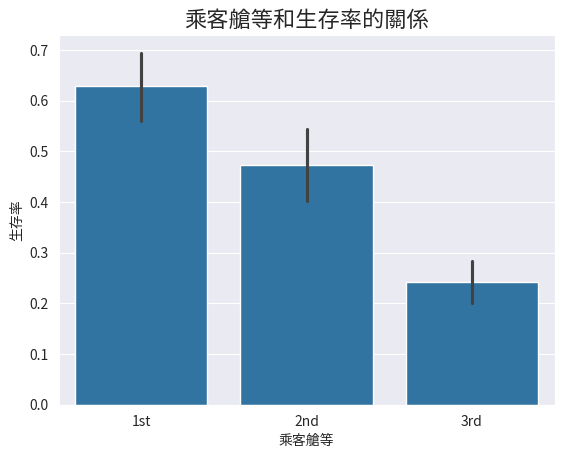

In [8]:
# get the top board passengers survived rate.
combined_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# build graph
sns.barplot(x='Pclass', y='Survived', data=combined_df)

# set graph info text
plt.title('乘客艙等和生存率的關係', fontsize = 16)
plt.xlabel('乘客艙等')
plt.ylabel('生存率')

# 更改 x 軸標籤
plt.xticks(ticks=[0, 1, 2], labels=['1st', '2nd', '3rd'])

plt.show()

## 年齡層和平均票價的關係（折線圖）

從圖中可以大致得知，年齡越大，平均票價越高。

在 15~30 歲之間，票價都比較低，可以推算在剛出社會賺錢的人其實是最窮的。

70~75 之間有雪崩式的下跌，可能是資料不足，需要另外繪圖來確認。

- 圓括號 ( 或 ) 表示開區間，意味著該端點不包含在區間內。
- 方括號 [ 或 ] 表示閉區間，意味著該端點包含在區間內。

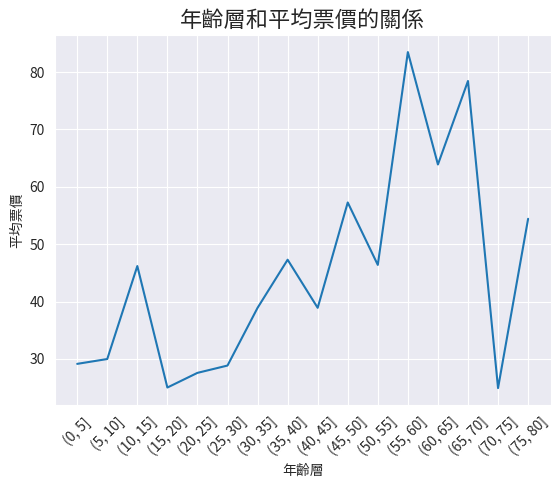

In [9]:
# 5年為一單位
age_bins = list(range(0, 85, 5))
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=age_bins)

# 計算每個年齡組的平均票價，顯式設置 observed 參數
age_group_fare = combined_df[['AgeGroup', 'Fare']].groupby('AgeGroup', observed=False).mean().reset_index()

# 為了讓 x 軸上的年齡組順序顯示，我們需要將 AgeGroup 轉換成字符串
age_group_fare['AgeGroup'] = age_group_fare['AgeGroup'].astype(str)

# 繪製折線圖
sns.lineplot(x='AgeGroup', y='Fare', data=age_group_fare)

# 設置圖表信息
plt.title('年齡層和平均票價的關係', fontsize=16)
plt.xlabel('年齡層')
plt.ylabel('平均票價')

# 修改x軸標籤的角度
plt.xticks(rotation=45)

# 顯示圖表
plt.show()

### 繪圖查證 70~75 歲之間的票價是否有問題（箱型圖）

從箱型圖中可以看出，乘客大多數為頭等艙，但總比數僅有 4 筆，導致票價分布不均。

4 筆中的 1 筆資料，二等艙票價拉低了平均值。


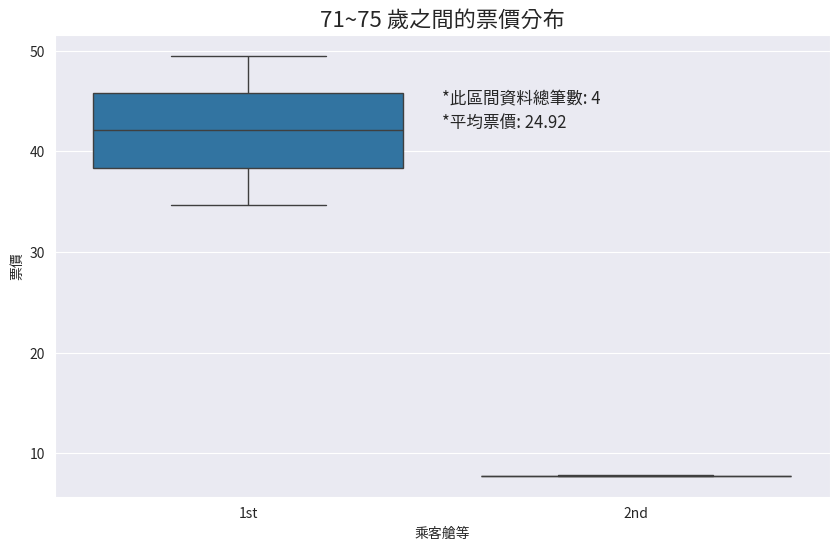

In [10]:
# 篩選出 71~75 歲之間的乘客
age_71_75 = combined_df[(combined_df['Age'] > 70) & (combined_df['Age'] < 75)]

# 繪製箱形圖
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', data=age_71_75)

plt.title('71~75 歲之間的票價分布', fontsize=16)
plt.xlabel('乘客艙等')
plt.ylabel('票價')
plt.xticks(ticks=[0, 1], labels=['1st', '2nd'])


# 計算票價的平均值
mean_fare = age_71_75['Fare'].mean()

# 在圖表說明附註 資料總筆數 和 平均票價
plt.text(0.5, 0.85, f'*此區間資料總筆數: {age_71_75.shape[0]}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f'*平均票價: {mean_fare:.2f}', fontsize=12, transform=plt.gca().transAxes)

plt.show()

## 男女比例（圓餅圖）

可以看出男女在年齡層的比例相似，並且以 20~30 歲的乘客最多。

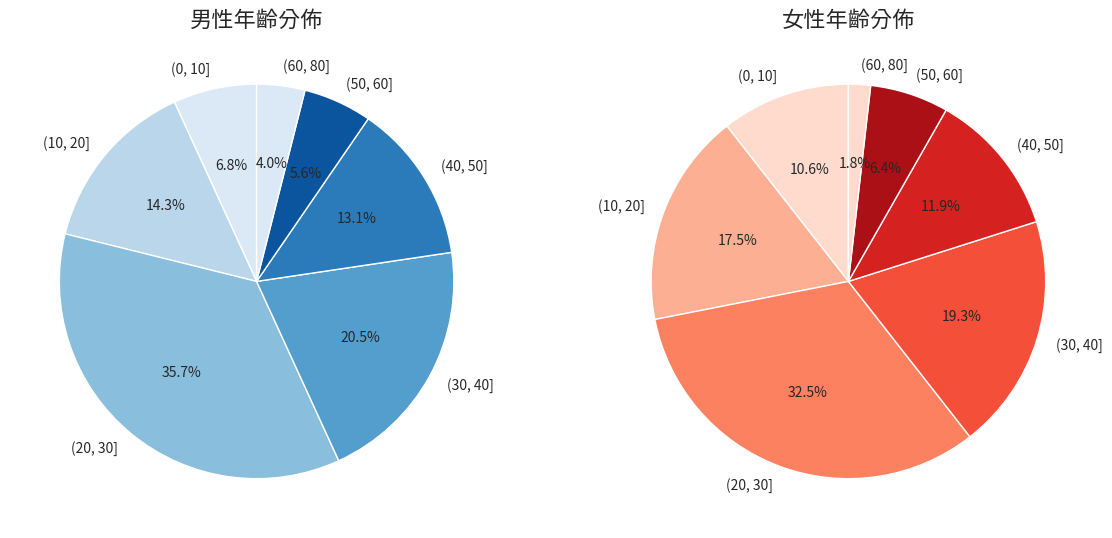

In [11]:
# 區分男女資料集
male_df = combined_df[combined_df['Sex'] == 'male'].copy()
female_df = combined_df[combined_df['Sex'] == 'female'].copy()

# 切割資料
age_bins = [0, 10, 20, 30, 40, 50, 60, 80] 
male_df['AgeGroup'] = pd.cut(male_df['Age'], bins=age_bins).astype('category')
female_df['AgeGroup'] = pd.cut(female_df['Age'], bins=age_bins).astype('category')

# 計算每個年齡組的人數
male_age_counts = male_df['AgeGroup'].value_counts().sort_index()
female_age_counts = female_df['AgeGroup'].value_counts().sort_index()

# 繪製男性圓餅圖
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
male_age_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('男性年齡分佈', fontsize=16)
plt.ylabel('')

# 繪製女性圓餅圖
plt.subplot(1, 2, 2)
female_age_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title('女性年齡分佈', fontsize=16)
plt.ylabel('')

plt.show()

### 票價和乘客艙等（散點圖）

有一筆票價為 500 的資料，應視為異常值。

也有許多票價為 0 的資料，可能是免費票或是資料錯誤。

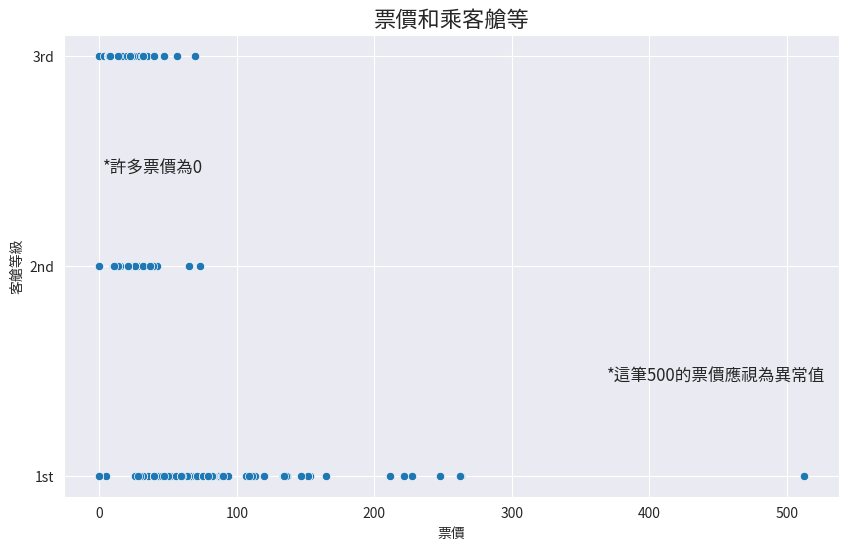

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Fare', y='Pclass', data=combined_df)

# 設置 y 軸刻度僅顯示 1, 2, 3
plt.yticks([1, 2, 3])

# 添加標題和標籤
plt.title('票價和乘客艙等', fontsize=16)
plt.xlabel('票價')
plt.ylabel('客艙等級')
# 更改 x 軸標籤
plt.yticks(ticks=[1, 2, 3], labels=['1st', '2nd', '3rd'])

# 添加說明
plt.text(0.7, 0.25, '*這筆500的票價應視為異常值', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.05, 0.7, '*許多票價為0', fontsize=12, transform=plt.gca().transAxes)

# 顯示圖表
plt.show()

### 移除異常值後的散點圖

可以三等艙 和 二等艙的票價分布較為集中且相似。

頭等艙的票價則分布較廣，可能是因為頭等艙的人不在乎票價，上好美盤。

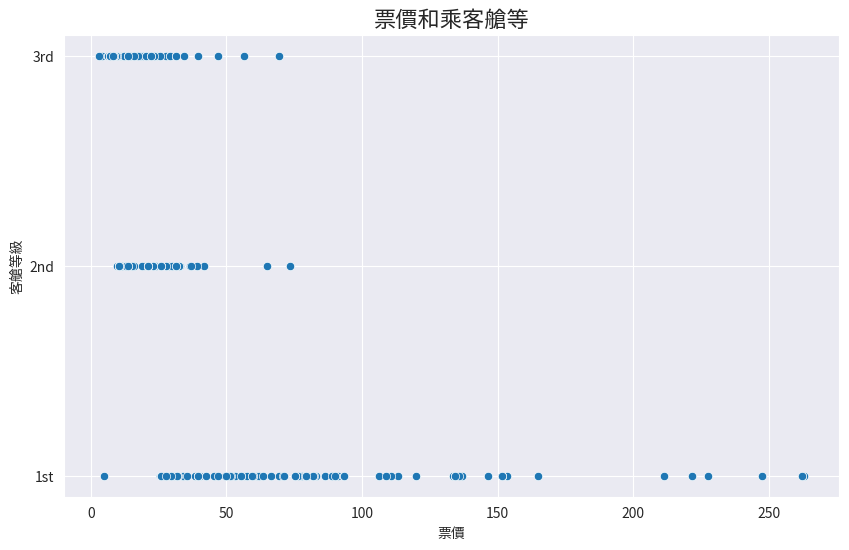

In [13]:
# 移除票價為 500 和 票價為0 的資料
combined_df = combined_df[(combined_df['Fare'] < 500) & (combined_df['Fare'] != 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Pclass', data=combined_df)

# 設置 y 軸刻度僅顯示 1, 2, 3
plt.yticks([1, 2, 3])

# 添加標題和標籤
plt.title('票價和乘客艙等', fontsize=16)
plt.xlabel('票價')
plt.ylabel('客艙等級')
# 更改 x 軸標籤
plt.yticks(ticks=[1, 2, 3], labels=['1st', '2nd', '3rd'])

# 顯示圖表
plt.show()